In [1]:
# Import all the necessary tooling
import tensorflow as tf
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np
import seaborn as sns 
# Matplotlib
import matplotlib.pyplot as plt

In [59]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

# Create the labels
number_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
float64
uint8


In [60]:
def create_linechart(result_fit):
    # Generate a line chart of the training process
    history = result_fit.history
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [61]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

auroc_metric = tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    multi_label=False,
)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - accuracy: 0.4665 - loss: 1.5093 - val_accuracy: 0.7743 - val_loss: 0.7479
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.7535 - loss: 0.8029 - val_accuracy: 0.7965 - val_loss: 0.6640
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.7769 - loss: 0.7216 - val_accuracy: 0.8000 - val_loss: 0.6346
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.7800 - loss: 0.7041 - val_accuracy: 0.8073 - val_loss: 0.6179
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.7817 - loss: 0.6943 - val_accuracy: 0.8103 - val_loss: 0.6087
313/313 - 0s - 562us/step - accuracy: 0.7880 - loss: 0.6805
Loss =  0.6804840564727783
Accuracy =  0.7879999876022339


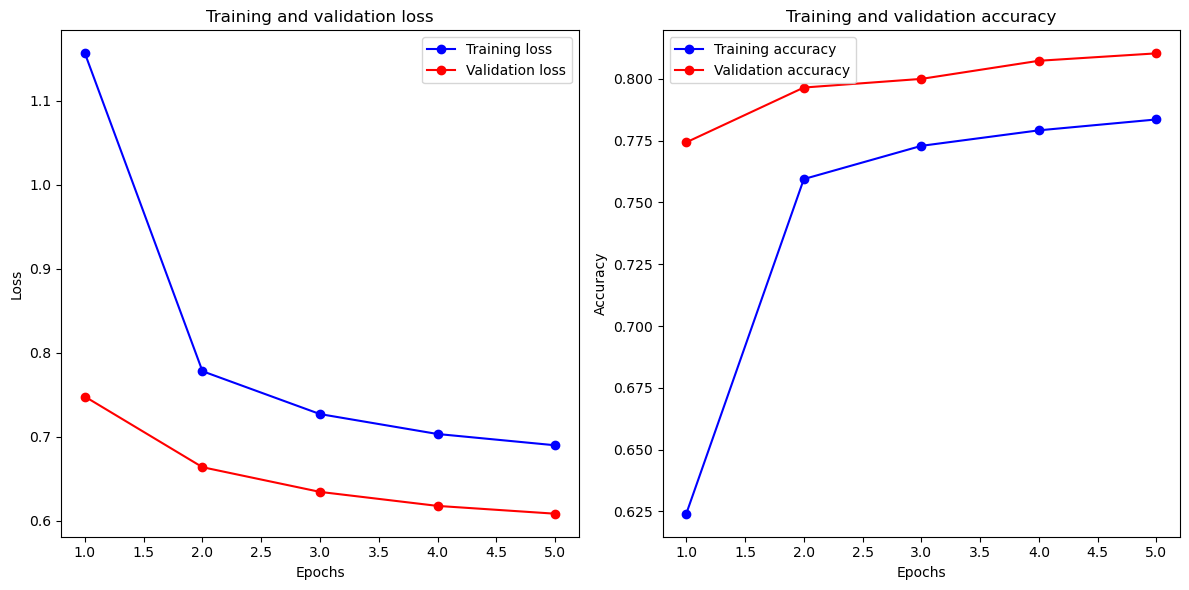

In [62]:
# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

create_linechart(result_fit=result_fit)

### Configuratie:

Resultaat: 
1 Hidden layer - Relu formule - 3 neuronen
1 output layer - 10 neuronen en softmax

Training nauwkeurigheid:  77.3 procent, Loss functie: 0.735
Test: Nauwkeurigheid: 77.3 procent, Loss functie 0.735

## Tweede poging configuratie:

Resultaat: 
1 Hidden layer - Relu formule - 9 neuronen
1 output layer - 10 neuronen en softmax

In [63]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(9, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 843us/step - accuracy: 0.6869 - loss: 0.9778 - val_accuracy: 0.9208 - val_loss: 0.2829
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9072 - loss: 0.3322 - val_accuracy: 0.9337 - val_loss: 0.2454
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.9161 - loss: 0.2988 - val_accuracy: 0.9367 - val_loss: 0.2313
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9197 - loss: 0.2890 - val_accuracy: 0.9393 - val_loss: 0.2243
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9227 - loss: 0.2742 - val_accuracy: 0.9395 - val_loss: 0.2209
313/313 - 0s - 654us/step - accuracy: 0.9246 - loss: 0.2693
Loss =  0.26928555965423584
Accuracy =  0.9246000051498413


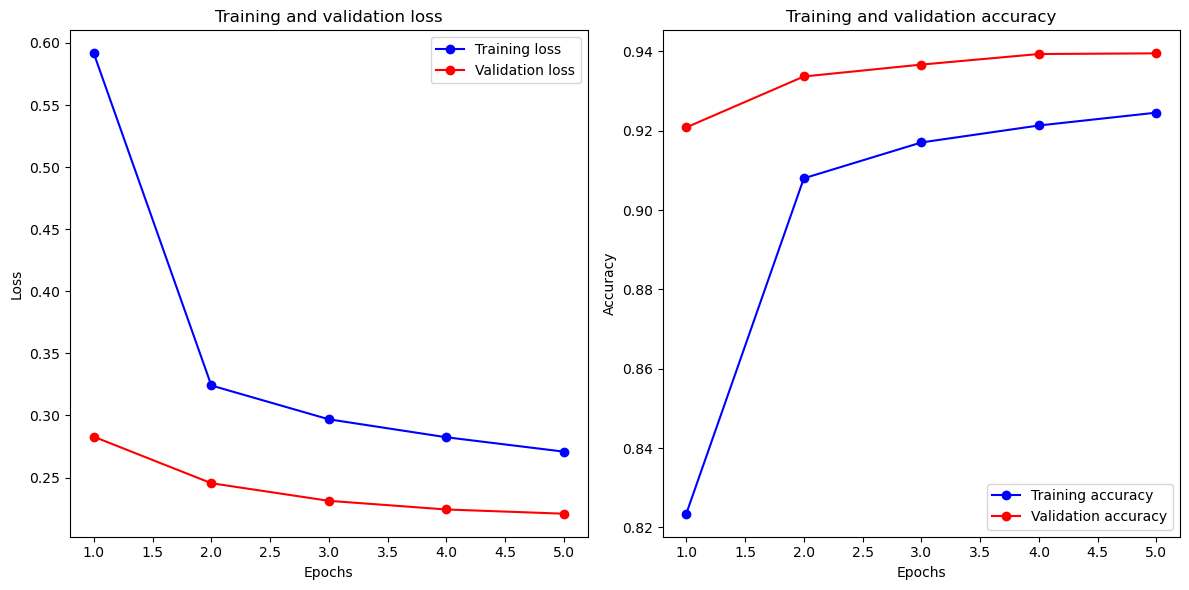

In [64]:
create_linechart(result_fit=result_fit)

### Resultaat:

Training: 92 procent, loss 0.27

Test: 92 procent, loss 0.27.

Conclusie, het aantal neuronen vergroten, zorgt voor een grotere nauwkeurigheid in ons model.

In [55]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(128, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)

Epoch 1/5


c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8725 - loss: 0.4485 - val_accuracy: 0.9645 - val_loss: 0.1244
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9608 - loss: 0.1287 - val_accuracy: 0.9743 - val_loss: 0.0903
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9746 - loss: 0.0853 - val_accuracy: 0.9780 - val_loss: 0.0757
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0624 - val_accuracy: 0.9775 - val_loss: 0.0744
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9869 - loss: 0.0439 - val_accuracy: 0.9773 - val_loss: 0.0760
313/313 - 0s - 623us/step - accuracy: 0.9757 - loss: 0.0794
Loss =  0.07935187965631485
Accuracy =  0.9757000207901001


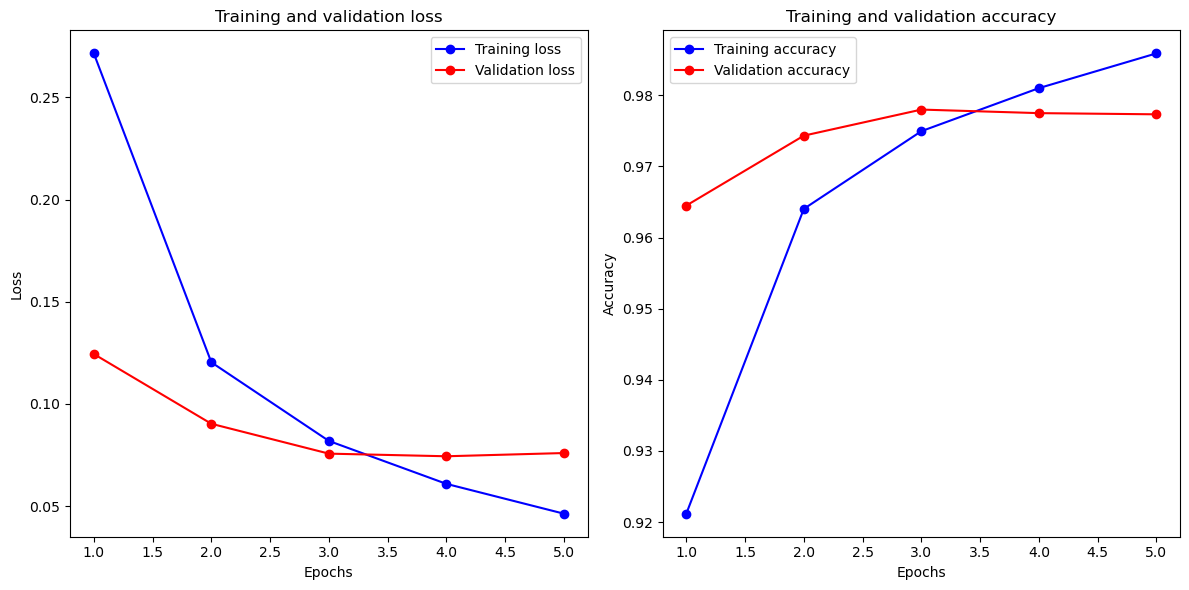

In [56]:
create_linechart(result_fit=result_fit)

Die nauwkeurigheid stijgt naar 97 procent als het aantal neuronen naar 128 omhoog gaat. Met een waarde verlies van 0.07

## Poging met hogere learning rate

De learning rate is in deze poging van 0.005 naar 1.0 gezet.

Epoch 1/5


c:\Users\Xin20\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 739us/step - accuracy: 0.1019 - loss: 4.4175 - val_accuracy: 0.0995 - val_loss: 2.4761
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.1022 - loss: 2.4046 - val_accuracy: 0.1113 - val_loss: 2.3791
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.0999 - loss: 2.4106 - val_accuracy: 0.0992 - val_loss: 2.4159
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.1018 - loss: 2.4123 - val_accuracy: 0.1050 - val_loss: 2.4187
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.1021 - loss: 2.4084 - val_accuracy: 0.0952 - val_loss: 2.4251
313/313 - 0s - 578us/step - accuracy: 0.0958 - loss: 2.4277
Loss =  2.4277262687683105
Accuracy =  0.0957999974489212


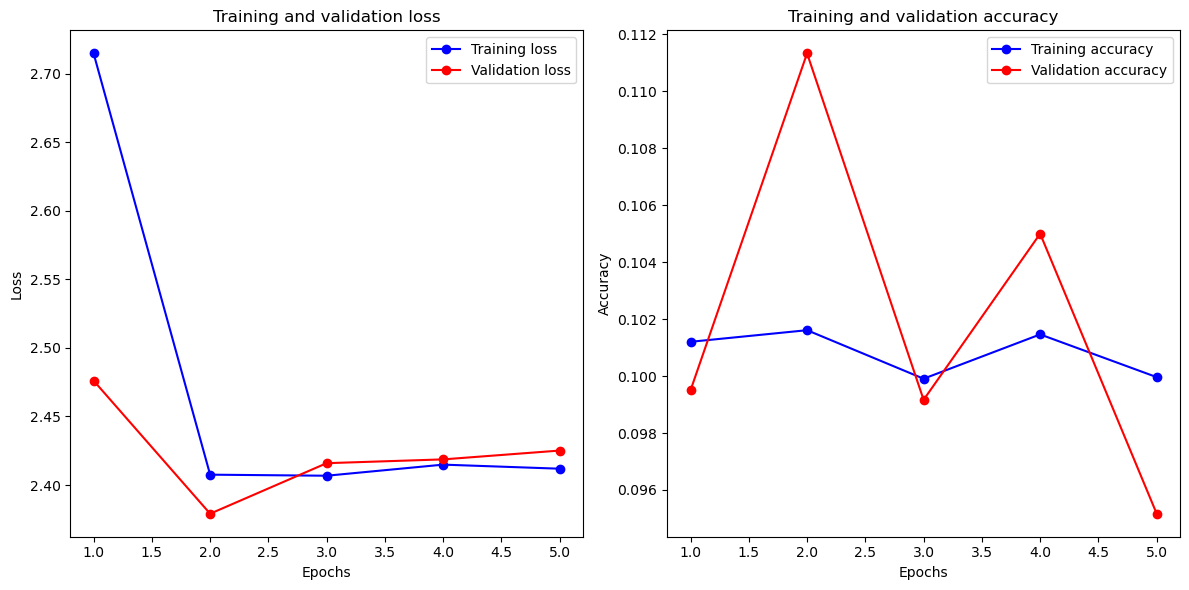

In [57]:
# My version
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd. === Getal is hoger.
adam = tf.keras.optimizers.Adam(learning_rate=1.0)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)
create_linechart(result_fit=result_fit)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 784us/step - accuracy: 0.1019 - loss: 2.4139 - val_accuracy: 0.1050 - val_loss: 2.3576
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.1022 - loss: 2.4144 - val_accuracy: 0.0952 - val_loss: 2.4416
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.0990 - loss: 2.4081 - val_accuracy: 0.0960 - val_loss: 2.3760
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.1021 - loss: 2.4032 - val_accuracy: 0.0915 - val_loss: 2.4493
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.1020 - loss: 2.4128 - val_accuracy: 0.0960 - val_loss: 2.4329
313/313 - 0s - 570us/step - accuracy: 0.1009 - loss: 2.4196
Loss =  2.4195950031280518
Accuracy =  0.10090000182390213


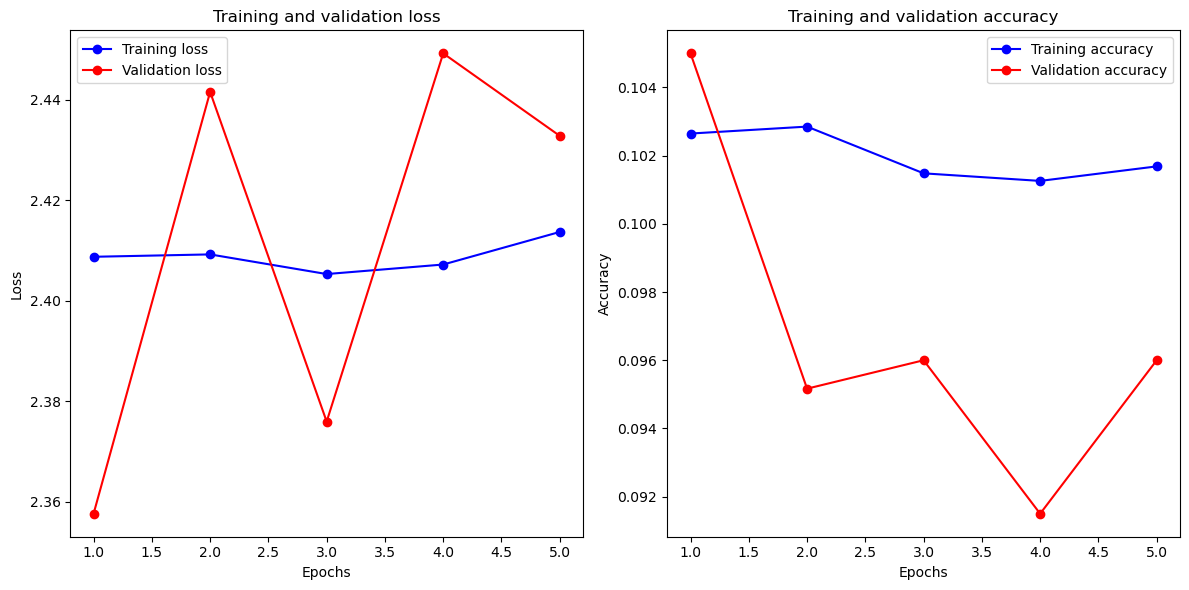

In [58]:
# My version met extra layers
# Imports
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

#Train dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # ReLu formula is used to determine the value
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    # The output layer 
    tf.keras.layers.Dense(10, activation="softmax")
])

# Nu een optimizer toegevoegd. === Getal is hoger.
adam = tf.keras.optimizers.Adam(learning_rate=1.0)

# Compile the model
model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

# Evaluate
# Use the model for prediction
result_fit = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss = ',test_loss)
print('Accuracy = ', test_acc)
create_linechart(result_fit=result_fit)

### Conclusie:

Een hogere learning rate leidt tot lagere nauwkeurigheid van het model. Dit leidt ook tot grotere value loss waarden

Dit kan ook niet opgelost worden door extra layers toe te voegen.